# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

train_data.head()

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561


In [5]:
test_data.head()

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936


## 2) Investigate the Dataset
In the datasets, you're given columns of time and A through N, each of which represent some sort of real-life market quantity. In the train dataset, you're also given Y1 and Y2, real-life market quantities you'd like to predict in terms of time and A through N. You're not given Y1 and Y2 in the test set, because this is what you're being asked to predict.

Let's do some exploration of the relationships of A - N and Y1. In particular, let's look at the relationship between C and Y1:

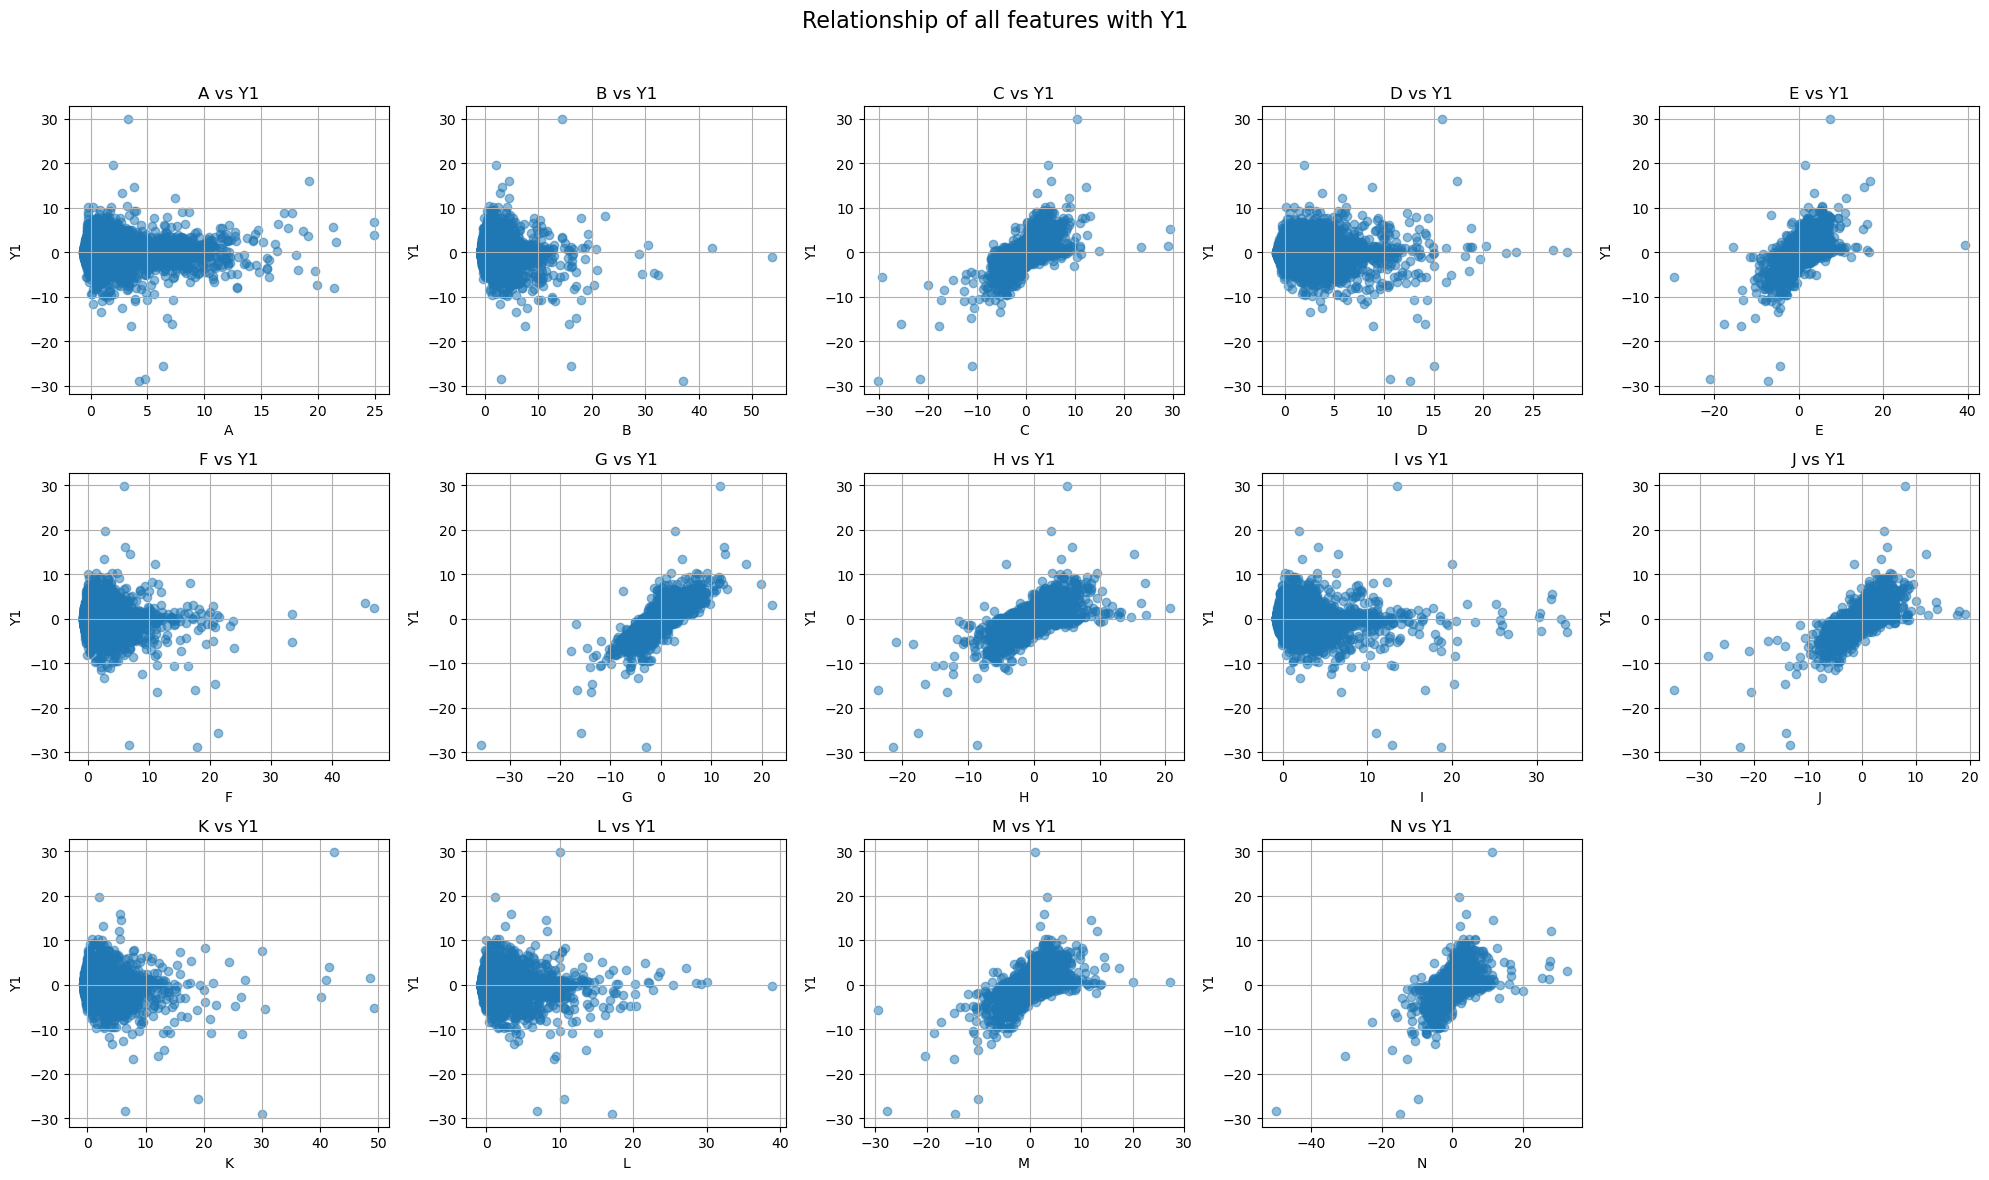

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.suptitle('Relationship of all features with Y1', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['Y1'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Y1')
    axes[i].set_title(f'{feature} vs Y1')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

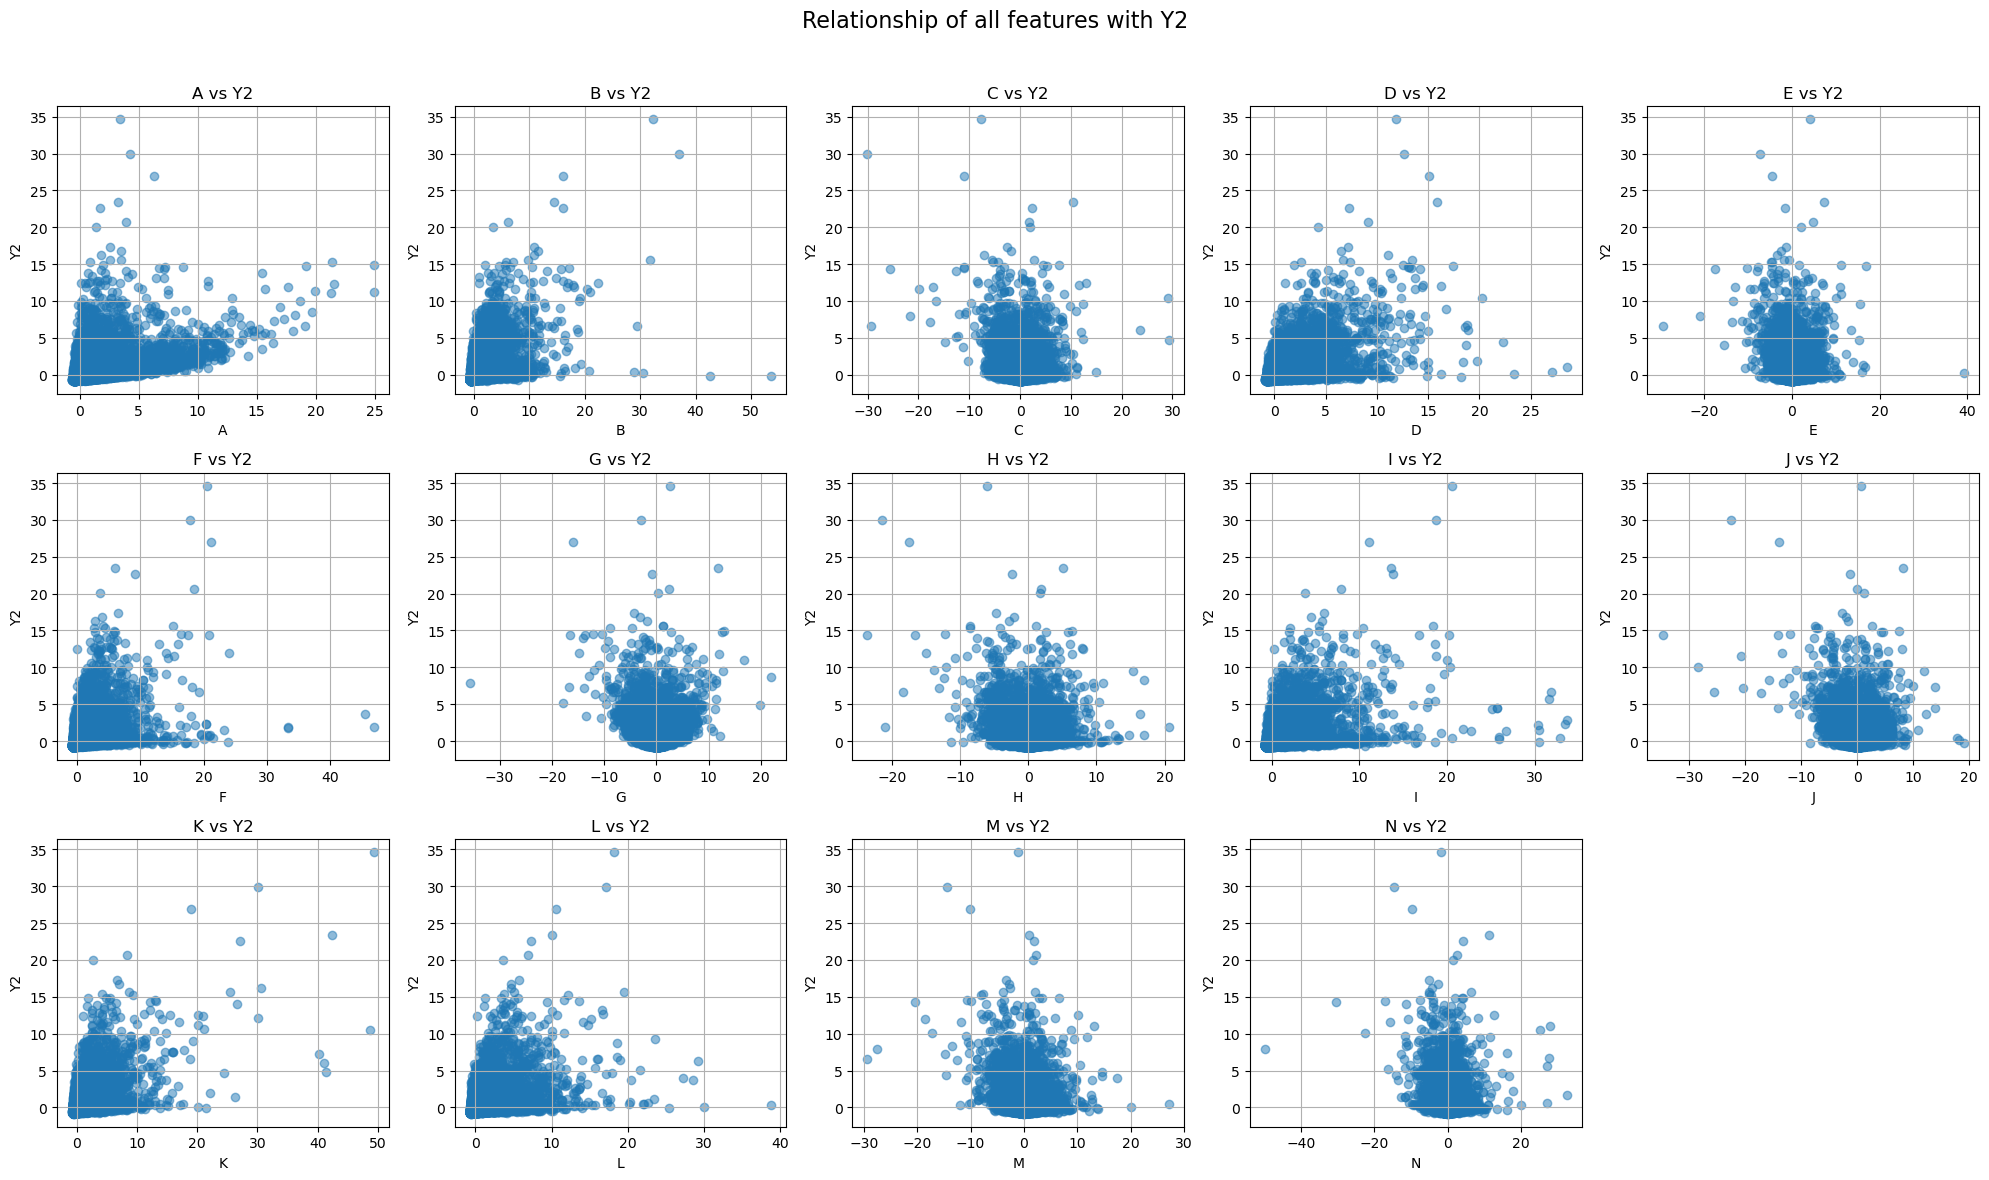

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.suptitle('Relationship of all features with Y2', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['Y2'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Y2')
    axes[i].set_title(f'{feature} vs Y2')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

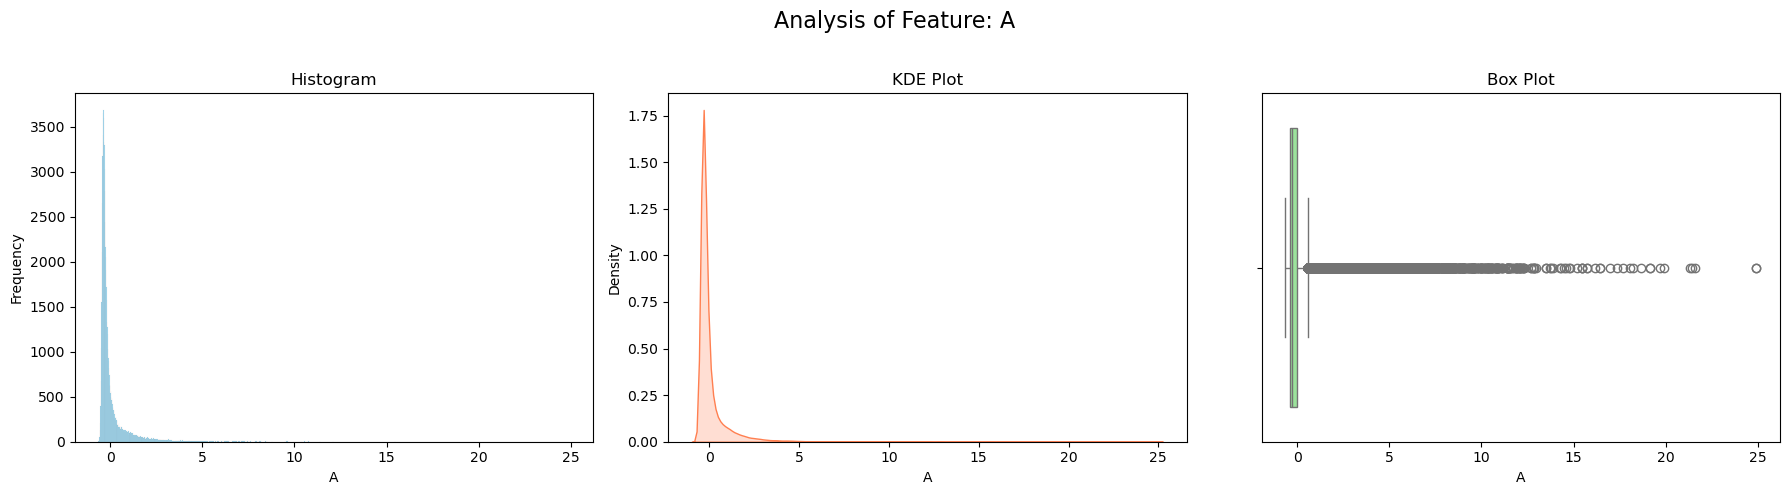

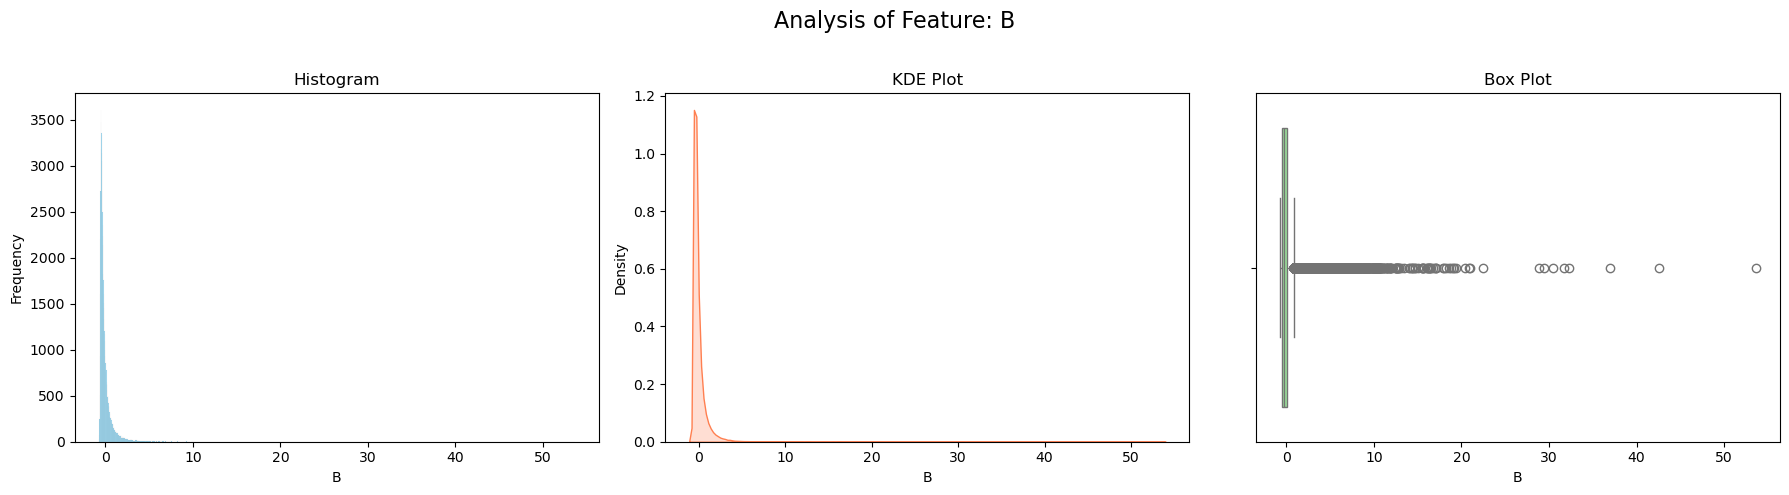

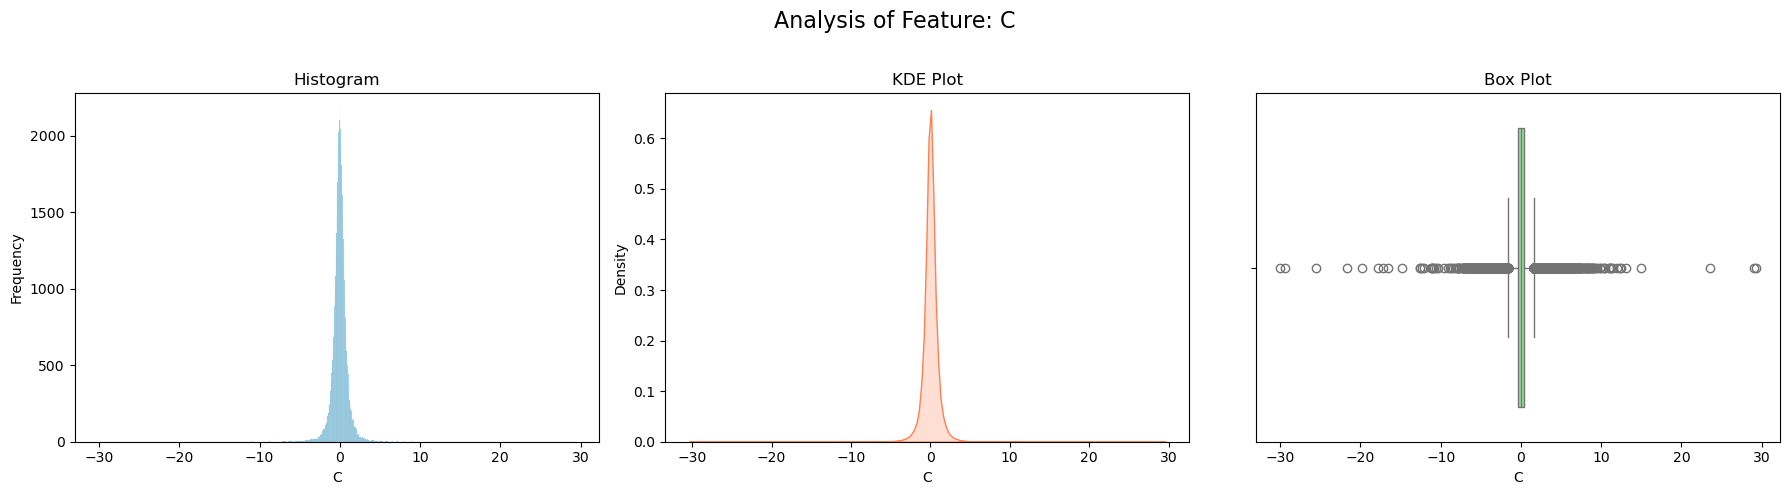

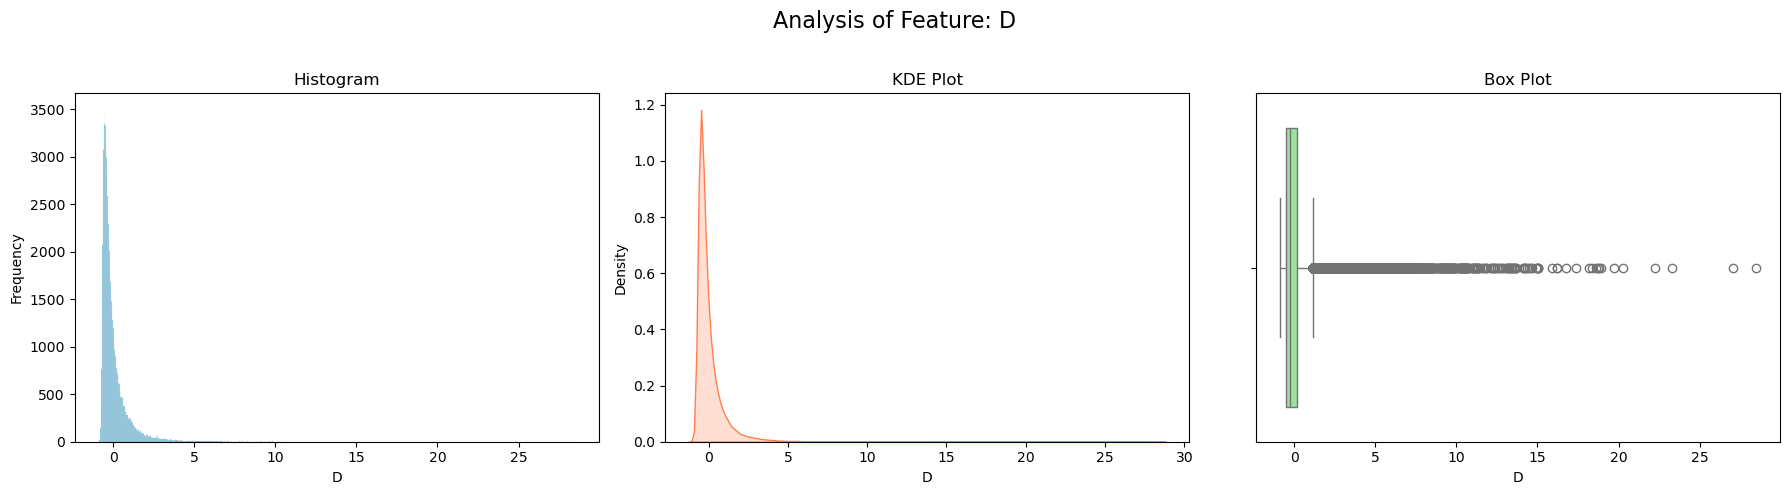

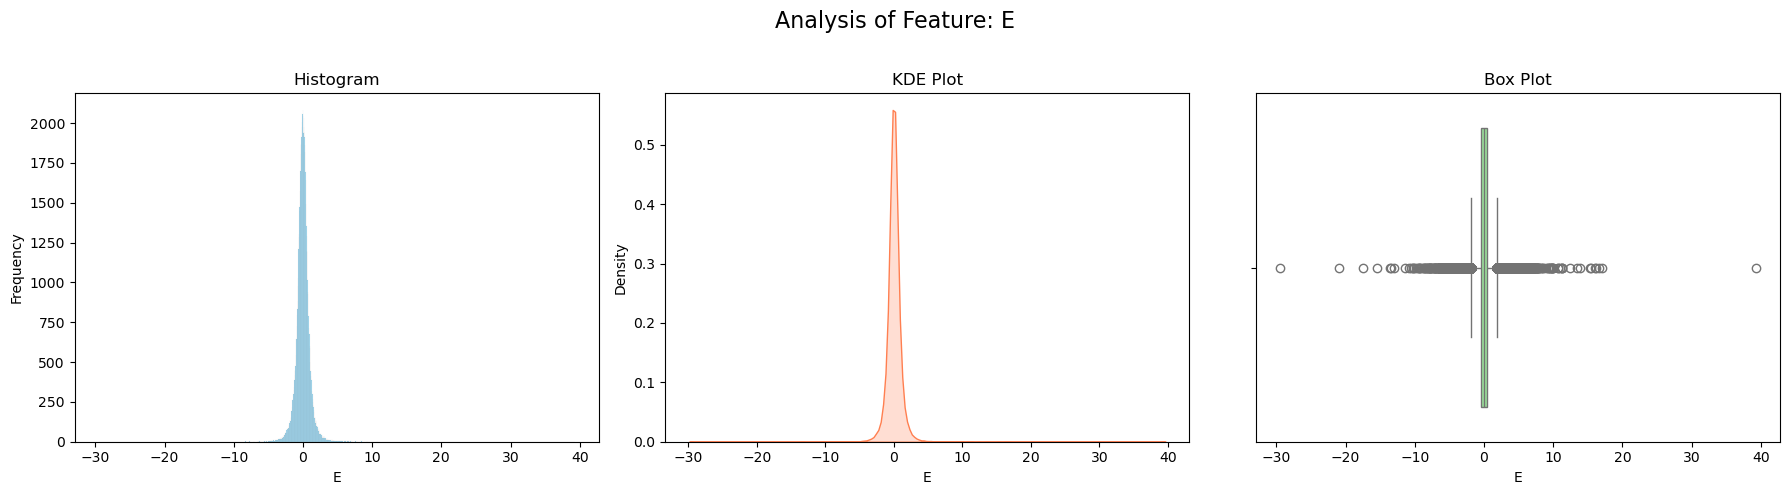

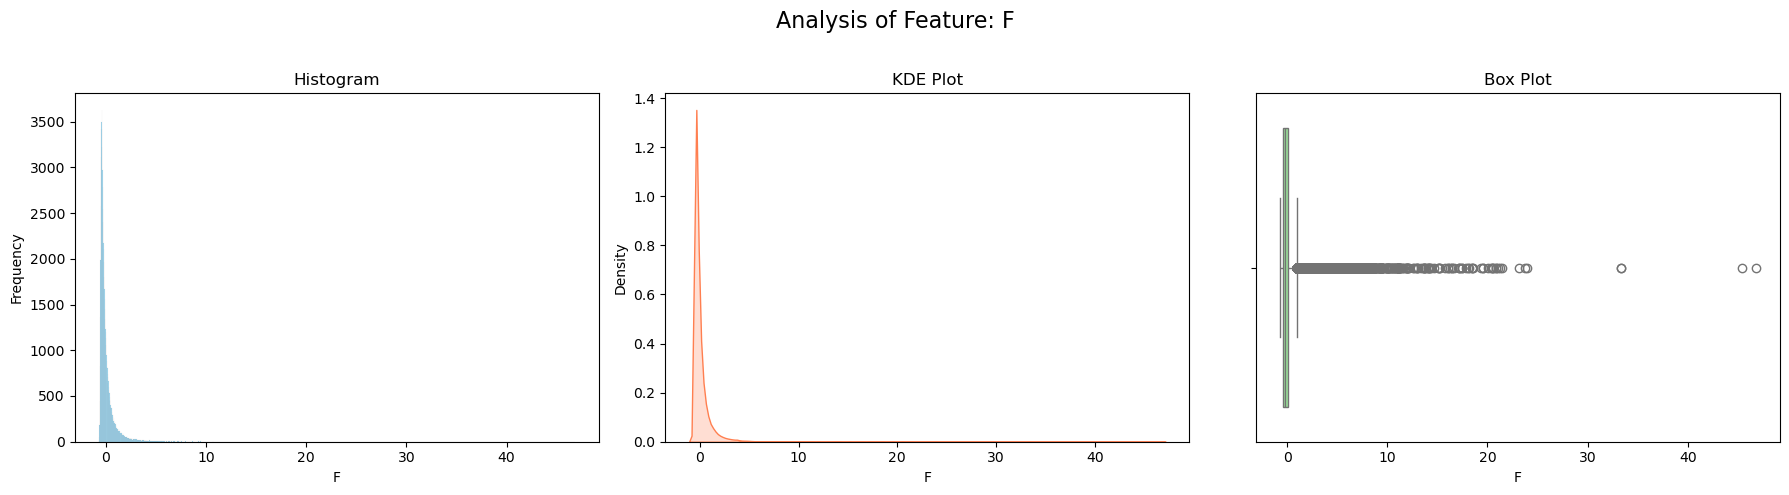

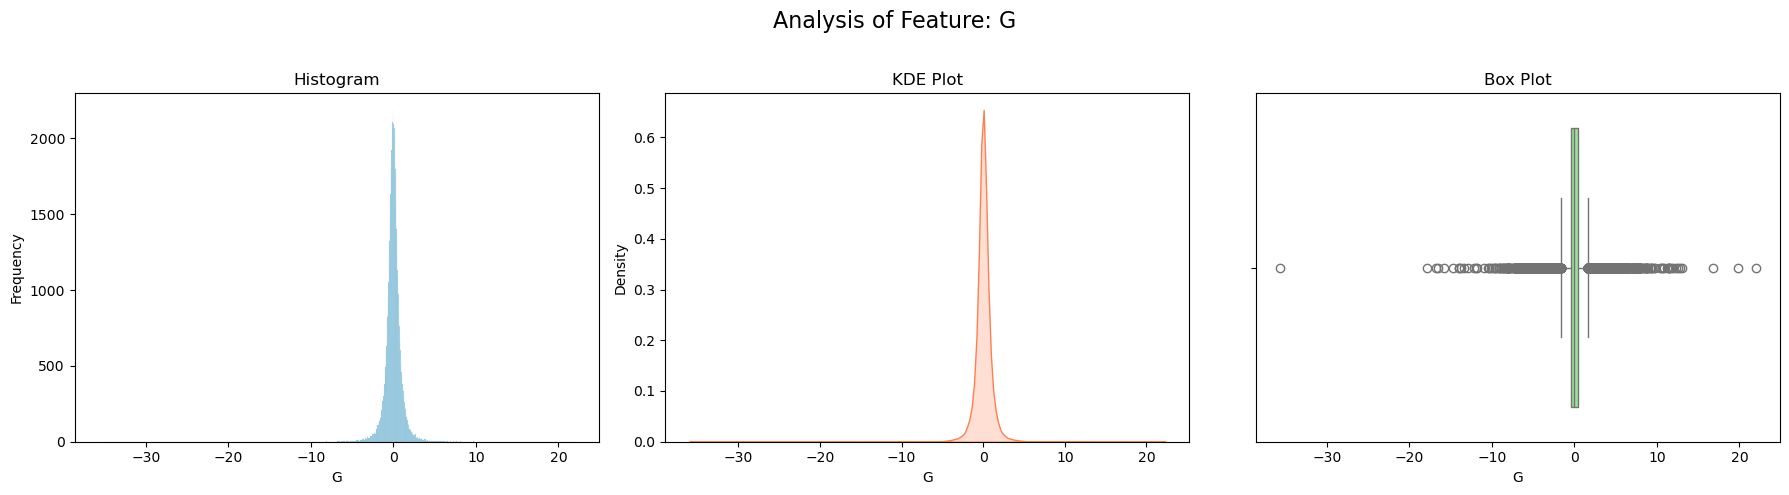

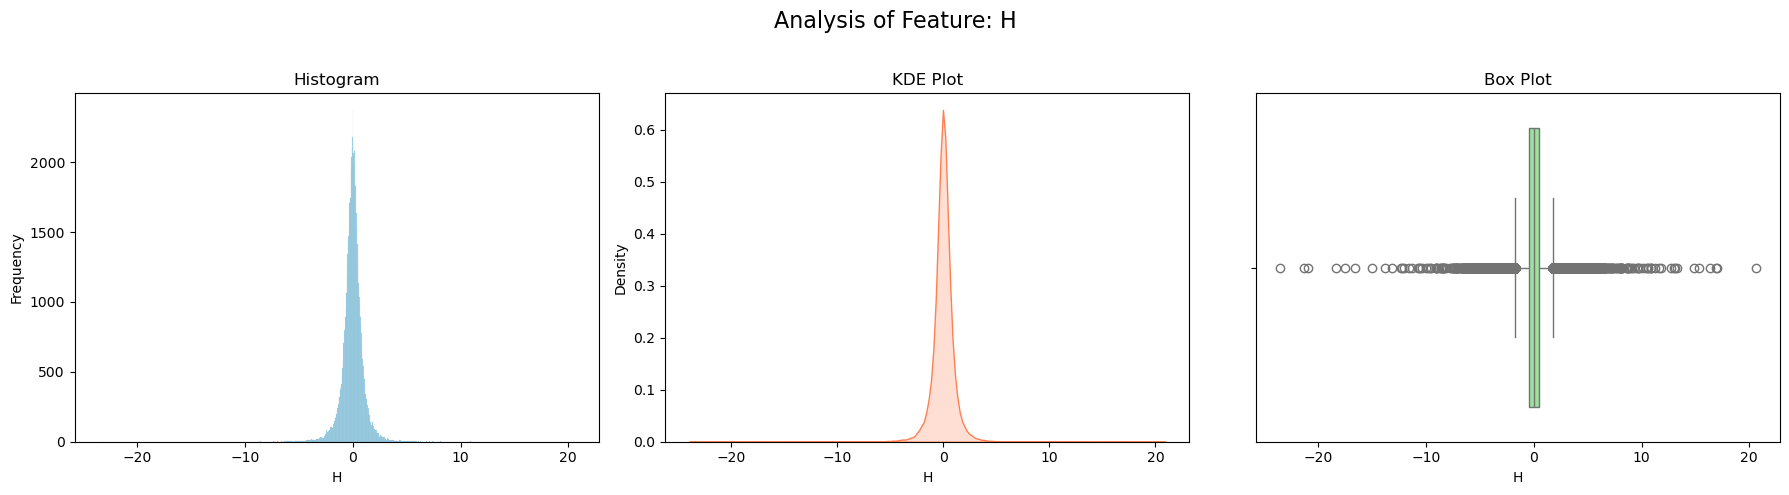

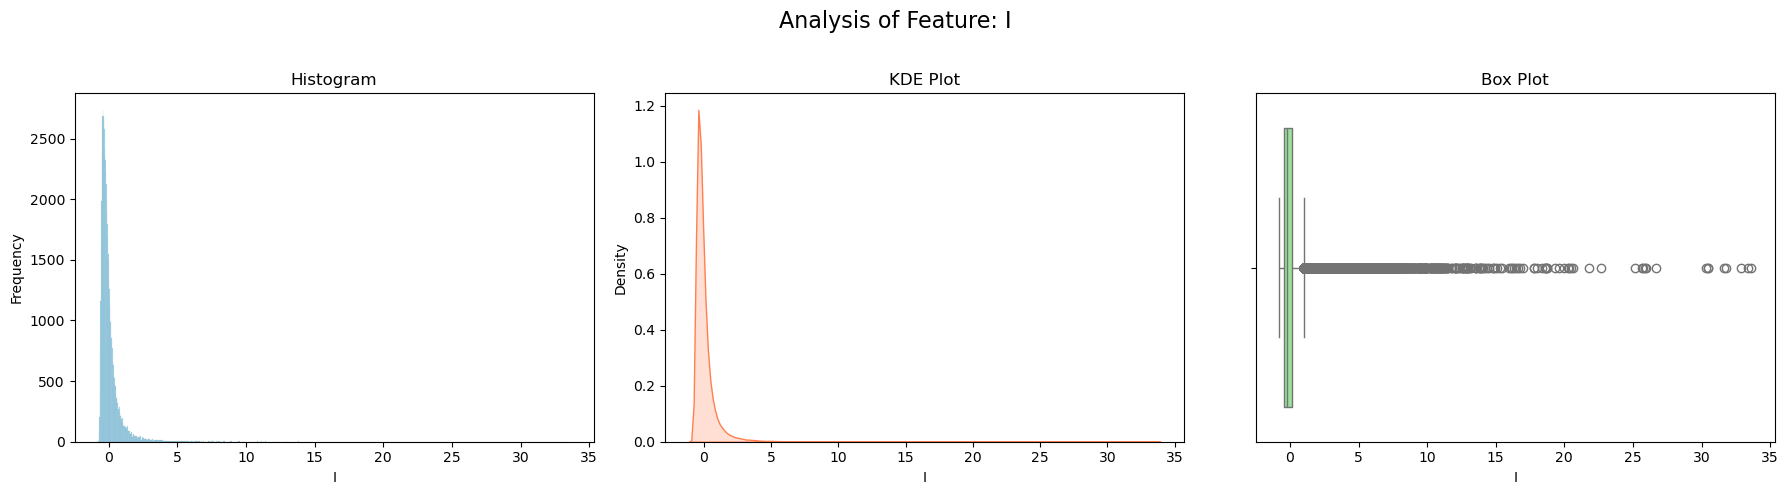

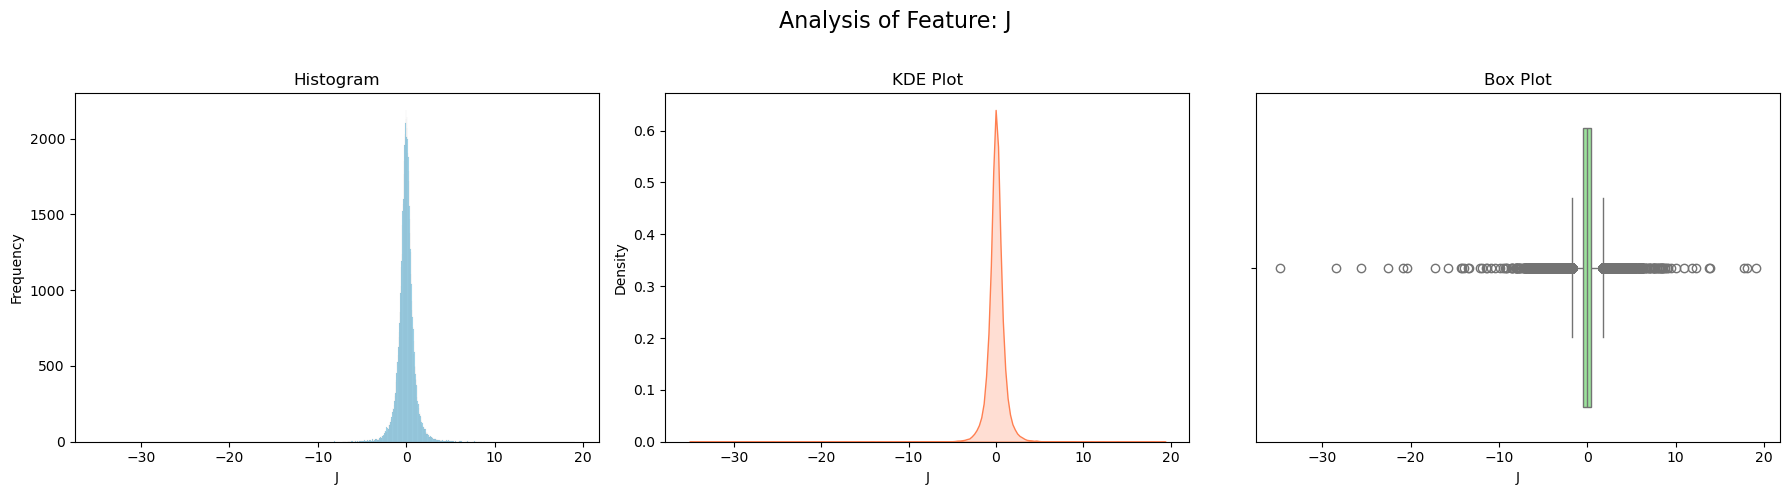

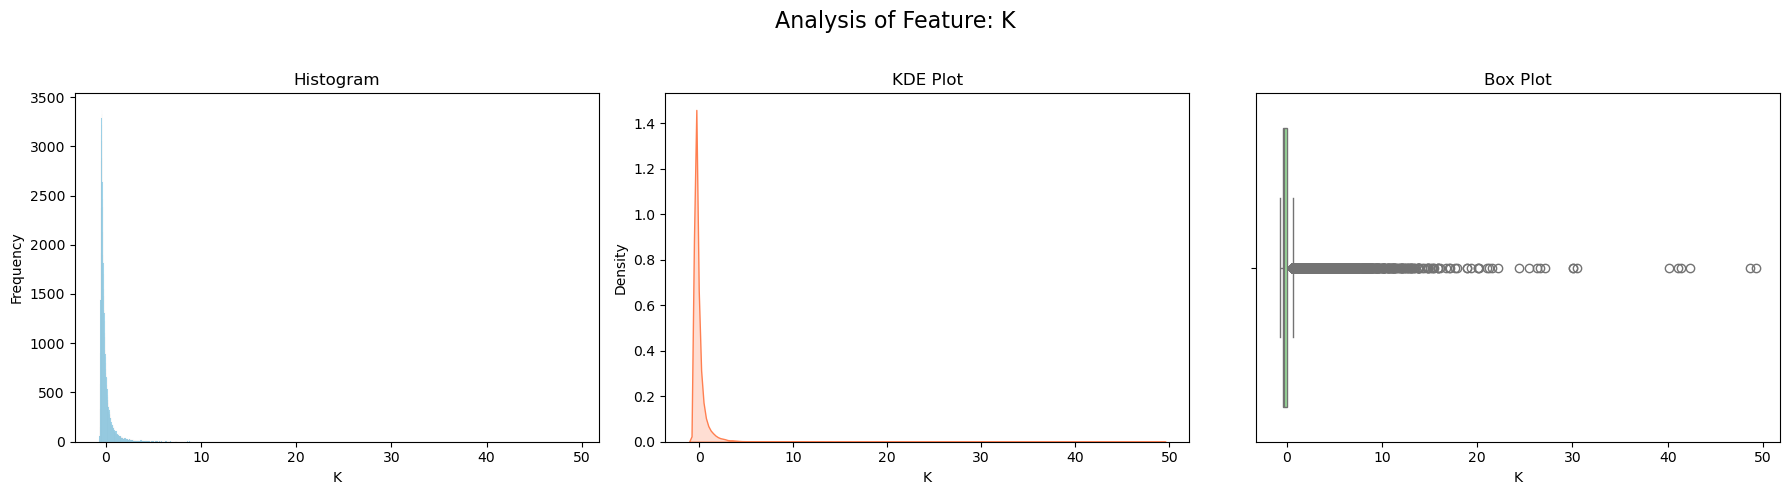

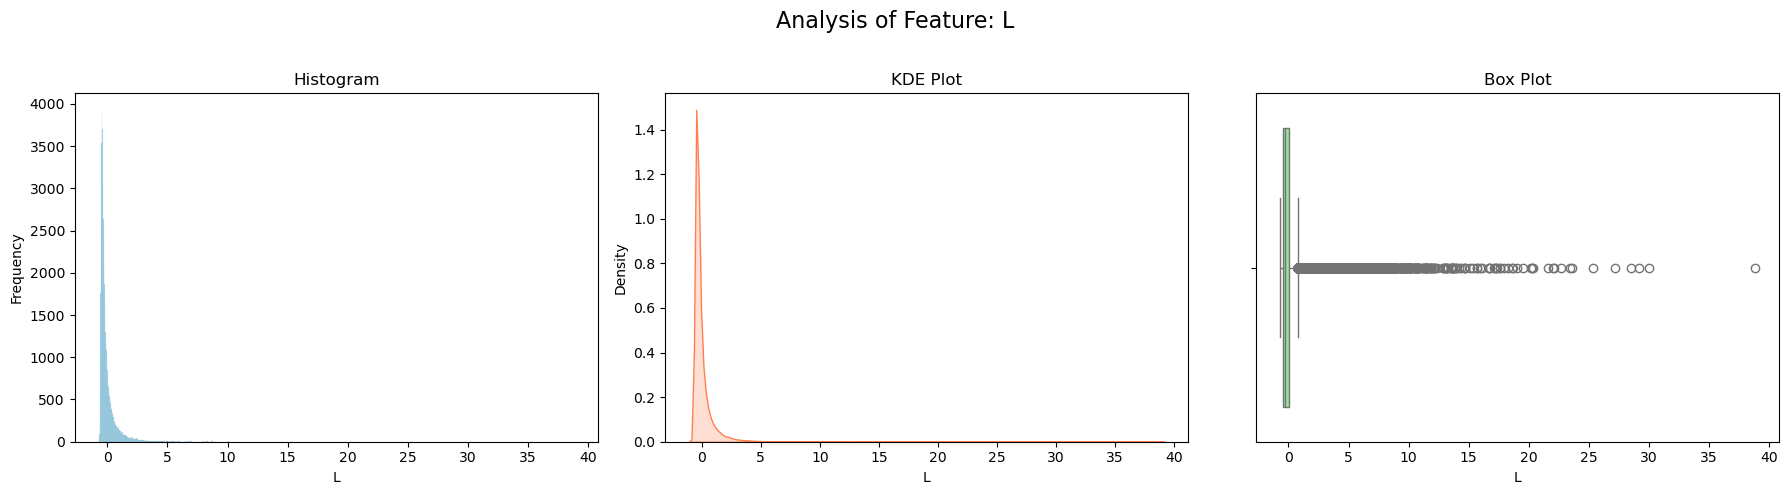

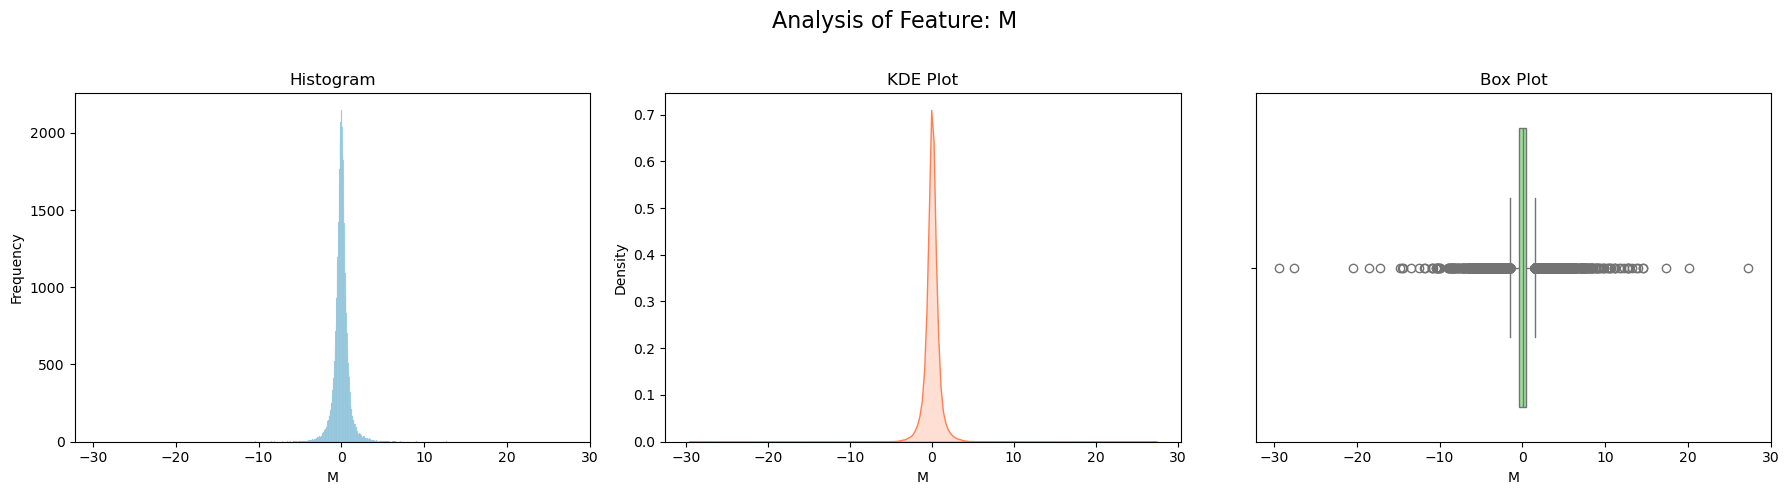

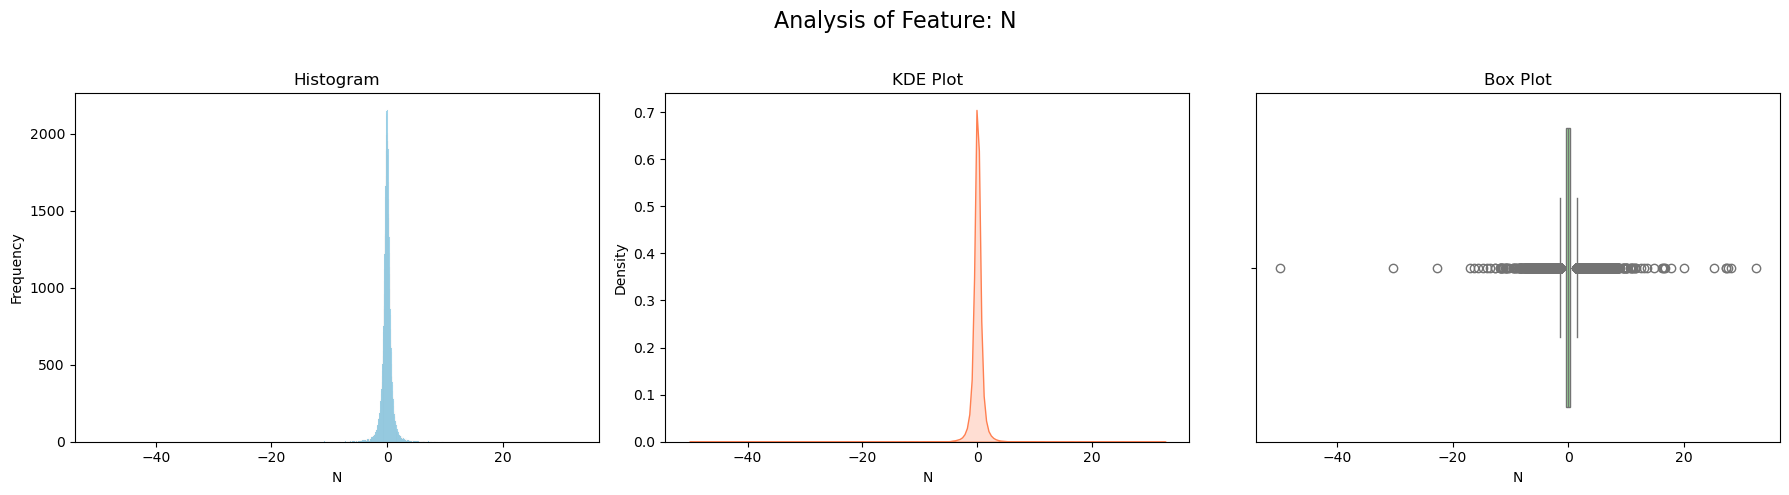

In [8]:
import seaborn as sns

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Analysis of Feature: {feature}', fontsize=16)

    sns.histplot(train_data[feature], kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    sns.kdeplot(train_data[feature], fill=True, ax=axes[1], color='coral')
    axes[1].set_title('KDE Plot')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Density')

    sns.boxplot(x=train_data[feature], ax=axes[2], color='lightgreen')
    axes[2].set_title('Box Plot')
    axes[2].set_xlabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [9]:
correlation = train_data['A'].corr(train_data['Y1'])
print(f"Correlation between A and Y1: {correlation:.4f}")

correlation = train_data['B'].corr(train_data['Y1'])
print(f"Correlation between B and Y1: {correlation:.4f}")

correlation = train_data['C'].corr(train_data['Y1'])
print(f"Correlation between C and Y1: {correlation:.4f}")

correlation = train_data['D'].corr(train_data['Y1'])
print(f"Correlation between D and Y1: {correlation:.4f}")

correlation = train_data['E'].corr(train_data['Y1'])
print(f"Correlation between E and Y1: {correlation:.4f}")

correlation = train_data['F'].corr(train_data['Y1'])
print(f"Correlation between F and Y1: {correlation:.4f}")

correlation = train_data['G'].corr(train_data['Y1'])
print(f"Correlation between G and Y1: {correlation:.4f}")

correlation = train_data['H'].corr(train_data['Y1'])
print(f"Correlation between H and Y1: {correlation:.4f}")

correlation = train_data['I'].corr(train_data['Y1'])
print(f"Correlation between I and Y1: {correlation:.4f}")

correlation = train_data['J'].corr(train_data['Y1'])
print(f"Correlation between J and Y1: {correlation:.4f}")

correlation = train_data['K'].corr(train_data['Y1'])
print(f"Correlation between K and Y1: {correlation:.4f}")

correlation = train_data['L'].corr(train_data['Y1'])
print(f"Correlation between L and Y1: {correlation:.4f}")

correlation = train_data['M'].corr(train_data['Y1'])
print(f"Correlation between M and Y1: {correlation:.4f}")

correlation = train_data['N'].corr(train_data['Y1'])
print(f"Correlation between N and Y1: {correlation:.4f}")

Correlation between A and Y1: -0.0061
Correlation between B and Y1: -0.0950
Correlation between C and Y1: 0.7038
Correlation between D and Y1: -0.0571
Correlation between E and Y1: 0.6843
Correlation between F and Y1: -0.0732
Correlation between G and Y1: 0.8146
Correlation between H and Y1: 0.7076
Correlation between I and Y1: -0.0902
Correlation between J and Y1: 0.7239
Correlation between K and Y1: -0.0802
Correlation between L and Y1: -0.0724
Correlation between M and Y1: 0.6862
Correlation between N and Y1: 0.5958


In [10]:
correlation = train_data['A'].corr(train_data['Y2'])
print(f"Correlation between A and Y2: {correlation:.4f}")

correlation = train_data['B'].corr(train_data['Y2'])
print(f"Correlation between B and Y2: {correlation:.4f}")

correlation = train_data['C'].corr(train_data['Y2'])
print(f"Correlation between C and Y2: {correlation:.4f}")

correlation = train_data['D'].corr(train_data['Y2'])
print(f"Correlation between D and Y2: {correlation:.4f}")

correlation = train_data['E'].corr(train_data['Y2'])
print(f"Correlation between E and Y2: {correlation:.4f}")

correlation = train_data['F'].corr(train_data['Y2'])
print(f"Correlation between F and Y2: {correlation:.4f}")

correlation = train_data['G'].corr(train_data['Y2'])
print(f"Correlation between G and Y2: {correlation:.4f}")

correlation = train_data['H'].corr(train_data['Y1'])
print(f"Correlation between H and Y2: {correlation:.4f}")

correlation = train_data['I'].corr(train_data['Y1'])
print(f"Correlation between I and Y2: {correlation:.4f}")

correlation = train_data['J'].corr(train_data['Y1'])
print(f"Correlation between J and Y2: {correlation:.4f}")

correlation = train_data['K'].corr(train_data['Y1'])
print(f"Correlation between K and Y2: {correlation:.4f}")

correlation = train_data['L'].corr(train_data['Y1'])
print(f"Correlation between L and Y2: {correlation:.4f}")

correlation = train_data['M'].corr(train_data['Y1'])
print(f"Correlation between M and Y2: {correlation:.4f}")

correlation = train_data['N'].corr(train_data['Y1'])
print(f"Correlation between N and Y2: {correlation:.4f}")

Correlation between A and Y2: 0.4847
Correlation between B and Y2: 0.5819
Correlation between C and Y2: -0.0730
Correlation between D and Y2: 0.6111
Correlation between E and Y2: -0.0446
Correlation between F and Y2: 0.4967
Correlation between G and Y2: -0.0602
Correlation between H and Y2: 0.7076
Correlation between I and Y2: -0.0902
Correlation between J and Y2: 0.7239
Correlation between K and Y2: -0.0802
Correlation between L and Y2: -0.0724
Correlation between M and Y2: 0.6862
Correlation between N and Y2: 0.5958


Explained variance ratio of each principal component:
PC1: 0.3523
PC2: 0.2445
PC3: 0.0684
PC4: 0.0500
PC5: 0.0449
PC6: 0.0384
PC7: 0.0354
PC8: 0.0319
PC9: 0.0260
PC10: 0.0254
PC11: 0.0238
PC12: 0.0235
PC13: 0.0202
PC14: 0.0154


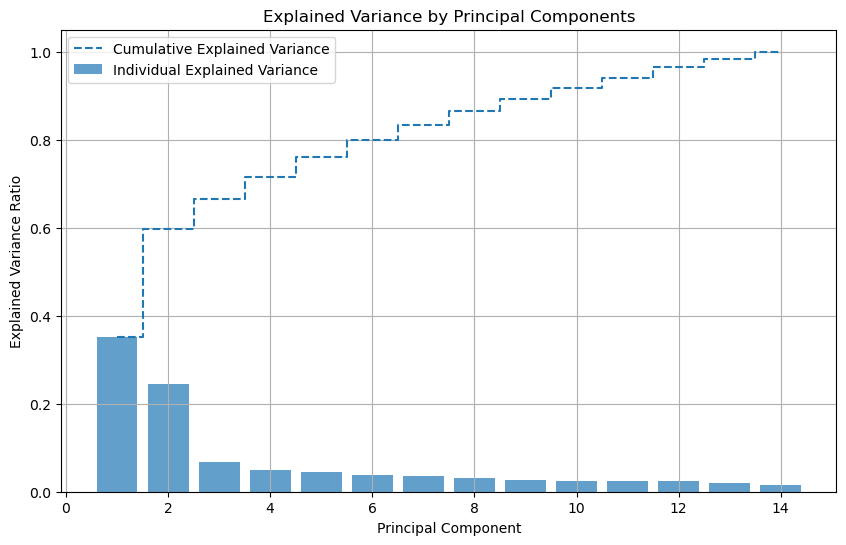

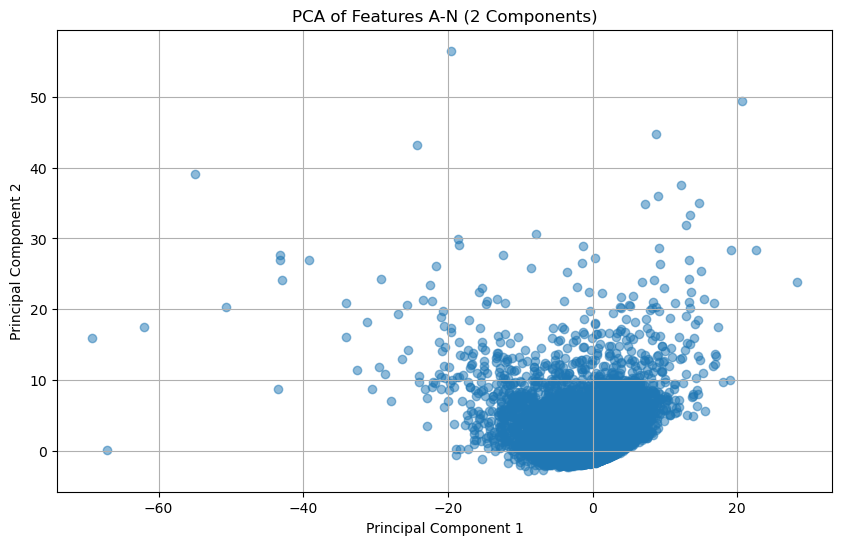

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X = train_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features A-N (2 Components)')
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train = train_data[features]
y1_train = train_data['Y1']
y2_train = train_data['Y2']

X_test = test_data[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Y1")
model_y1 = LinearRegression()
model_y1.fit(X_train_pca, y1_train)

y1_pred_train = model_y1.predict(X_train_pca)
r2_y1_train = r2_score(y1_train, y1_pred_train)
print(f"R-squared score on training data for Y1: {r2_y1_train:.4f}")

y1_pred_test = model_y1.predict(X_test_pca)

print("Y2")
model_y2 = LinearRegression()
model_y2.fit(X_train_pca, y2_train)

y2_pred_train = model_y2.predict(X_train_pca)
r2_y2_train = r2_score(y2_train, y2_pred_train)
print(f"R-squared score on training data for Y2: {r2_y2_train:.4f}")

y2_pred_test = model_y2.predict(X_test_pca)

preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})

Y1
R-squared score on training data for Y1: 0.7192
Y2
R-squared score on training data for Y2: 0.6071


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X_train = train_data[features]
y1_train = train_data['Y1']
y2_train = train_data['Y2']

X_test = test_data[features]

degree = 2
print(f"degree = {degree}\n")

print("Y1")
model_y1 = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_y1.fit(X_train, y1_train)

y1_pred_train = model_y1.predict(X_train)
r2_y1_train = r2_score(y1_train, y1_pred_train)
print(f"R-squared score on training data for Y1: {r2_y1_train:.4f}")

y1_pred_test = model_y1.predict(X_test)

print("\nY2")
model_y2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_y2.fit(X_train, y2_train)

y2_pred_train = model_y2.predict(X_train)
r2_y2_train = r2_score(y2_train, y2_pred_train)
print(f"R-squared score on training data for Y2: {r2_y2_train:.4f}")

y2_pred_test = model_y2.predict(X_test)

preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})
preds.to_csv('preds.csv', index=False)

degree = 2

Y1
R-squared score on training data for Y1: 0.7792

Y2
R-squared score on training data for Y2: 0.6861


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X_train = train_data[features]
y1_train = train_data['Y1']
y2_train = train_data['Y2']

X_test = test_data[features]

n_components = 3
degree = 2
print(f"PCA {n_components} components and degree = {degree}\n")

print("Y1")
pipeline_y1 = make_pipeline(
    StandardScaler(),
    PCA(n_components=n_components),
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

pipeline_y1.fit(X_train, y1_train)

y1_pred_train = pipeline_y1.predict(X_train)
r2_y1_train = r2_score(y1_train, y1_pred_train)
print(f"R-squared score on training data for Y1: {r2_y1_train:.4f}")

y1_pred_test = pipeline_y1.predict(X_test)

print("Y2")
pipeline_y2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=n_components),
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

pipeline_y2.fit(X_train, y2_train)

y2_pred_train = pipeline_y2.predict(X_train)
r2_y2_train = r2_score(y2_train, y2_pred_train)
print(f"R-squared score on training data for Y2: {r2_y2_train:.4f}")

y2_pred_test = pipeline_y2.predict(X_test)

preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})

# preds.to_csv('preds.csv', index=False)

PCA 3 components and degree = 2

Y1
R-squared score on training data for Y1: 0.7236
Y2
R-squared score on training data for Y2: 0.6179


Clearly there's a strong relationship between C and Y1. You should definitely use C to predict Y1!

## 3) Submit Predictions
In order to submit predictions, we need to make a CSV file with three columns: id, Y1, and Y2. In the below example, we let our predictions of Y1 and Y2 be the means of Y1 and Y2 in the train set.

In [18]:
preds = test_data[['id']]
preds['Y1'] = train_data['Y1'].mean()
preds['Y2'] = train_data['Y2'].mean()
preds

C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_40712\2816426628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = train_data['Y1'].mean()
C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_40712\2816426628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = train_data['Y2'].mean()


,id,Y1,Y2
0,1,-0.002807,-0.061172
1,2,-0.002807,-0.061172
2,3,-0.002807,-0.061172
3,4,-0.002807,-0.061172
4,5,-0.002807,-0.061172
...,...,...,...
15991,15992,-0.002807,-0.061172
15992,15993,-0.002807,-0.061172
15993,15994,-0.002807,-0.061172
15994,15995,-0.002807,-0.061172


In [19]:
# save preds to csv
preds.to_csv('preds.csv', index=False)

You should now be able to submit preds.csv to [https://quantchallenge.org/dashboard/data/upload-predictions](https://quantchallenge.org/dashboard/data/upload-predictions)! Note that you should receive a public $R^2$ score of $-0.042456$ with this set of predictions. You should try to get the highest possible $R^2$ score over the course of these next few days. Be careful of overfitting to the public score, which is only calculated on a subset of the test data—the final score that counts is the private $R^2$ score!